# Importing librarie

In [22]:
# this is the code to import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

## Import the dataset into your preferred data analytics tool

In [24]:
# Replace 'your_file.csv' with the path to your file
df = pd.read_csv("C:\\Users\\lotus\\OneDrive\\Documents\\data anaytics class nots\\Assignmnet 2\\sales_data.csv")

## Perform basic data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product_ID      1600 non-null   object 
 1   Price           1450 non-null   float64
 2   Units_Sold      1518 non-null   float64
 3   Sales           1600 non-null   float64
 4   Date            1600 non-null   object 
 5   Category        1522 non-null   object 
 6   Discount        1523 non-null   float64
 7   Store_Location  1600 non-null   object 
 8   Customer_ID     1600 non-null   object 
dtypes: float64(4), object(5)
memory usage: 112.6+ KB


In [4]:
# Step 1: Create a mapping of Product_ID to Category for non-missing values
product_category_map = df.dropna(subset=['Category']).set_index('Product_ID')['Category'].to_dict()

# Step 2: Fill missing categories using the map
df['Category'] = df.apply(
    lambda row: product_category_map.get(row['Product_ID'], row['Category']),
    axis=1)

In [5]:
# Step 1: Create a mapping of Product_ID to price for non-missing values
product_price_map = df.dropna(subset=['Price']).set_index('Product_ID')['Price'].to_dict()

# Step 2: Fill missing categories using the map
df['Price'] = df.apply(
    lambda row: product_price_map.get(row['Product_ID'], row['Price']),
    axis=1)

In [25]:
# Step 1: Create a mapping of Product_ID to discount for non-missing values
product_discount_map = df.dropna(subset=['Discount']).set_index('Product_ID')['Discount'].to_dict()

# Step 2: Fill missing categories using the map
df['Discount'] = df.apply(
    lambda row: product_discount_map.get(row['Product_ID'], row['Discount']),
    axis=1)

In [6]:
# Replace missing values in 'Units_Sold' with Sales / Price
df['Units_Sold'] = df.apply(
    lambda row: row['Sales'] / row['Price'] if pd.isnull(row['Units_Sold']) else row['Units_Sold'],
    axis=1
)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product_ID      1600 non-null   object 
 1   Price           1600 non-null   float64
 2   Units_Sold      1600 non-null   float64
 3   Sales           1600 non-null   float64
 4   Date            1600 non-null   object 
 5   Category        1600 non-null   object 
 6   Discount        1523 non-null   float64
 7   Store_Location  1600 non-null   object 
 8   Customer_ID     1600 non-null   object 
dtypes: float64(4), object(5)
memory usage: 112.6+ KB


## Explore the dataset by reviewing the first few rows and checking the column names.

In [8]:
# To view the first few rows of the dataset
df.head()

,Product_ID,Price,Units_Sold,Sales,Date,Category,Discount,Store_Location,Customer_ID
0,P0075,47.48,39.0,1851.72,2023-03-28,Electronics,15.0,California,C0135
1,P0032,375.96,63.0,23685.48,2023-11-02,Accessories,0.0,Texas,C0201
2,P0008,130.84,33.0,4317.72,2023-05-07,Accessories,0.0,New York,C0027
3,P0035,447.16,71.0,31748.36,2023-12-28,Food,15.0,Illinois,C0100
4,P0046,369.39,54.0,19947.06,2023-05-01,Food,0.0,New York,C0038


In [9]:
df.columns

Index(['Product_ID', 'Price', 'Units_Sold', 'Sales', 'Date', 'Category',
       'Discount', 'Store_Location', 'Customer_ID'],
      dtype='object')

# Data Analysis

## Calculate basic statistics (mean, median, and standard deviation) for numerical columns such as Price and Sales.

In [9]:
df.describe()

,Price,Units_Sold,Sales,Discount
count,1450.000000,1518.000000,1600.000000,1523.000000
mean,255.799855,51.856390,13001.018613,10.216678
std,143.146130,28.798469,11093.349094,7.063095
min,5.210000,1.000000,14.540000,0.000000
25%,135.535000,27.000000,3774.607500,5.000000
50%,255.995000,53.000000,9954.100000,10.000000
75%,378.825000,77.000000,19907.340000,15.000000
max,499.290000,100.000000,49095.090000,20.000000


## Identify the correlation between Price and Sales. Does a higher price lead to more or fewer sales?

In [ ]:
# Calculate the correlation between Price and Sales
correlation = df['Price'].corr(df['Sales'])

print("Correlation between Price and Sales:", correlation)
# it finds out the correlation between price and sales. There is positive correlation between sales and price,
# no higher price does not lead to fewer sales.

Correlation between Price and Sales: 0.03152872041751402


# Visualization:

## Create a scatter plot to visualize the relationship between Price and Sales

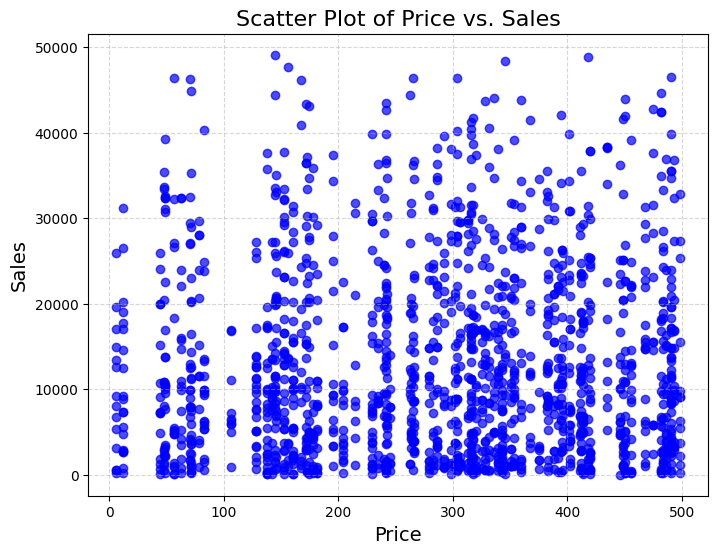

In [15]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Price'], df['Sales'], color='blue', alpha=0.7)

# Add titles and labels
plt.title("Scatter Plot of Price vs. Sales", fontsize=16)
plt.xlabel("Price", fontsize=14)
plt.ylabel("Sales", fontsize=14)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

## Generate a line plot to show the trend of Sales over time (if there is a time-related column).

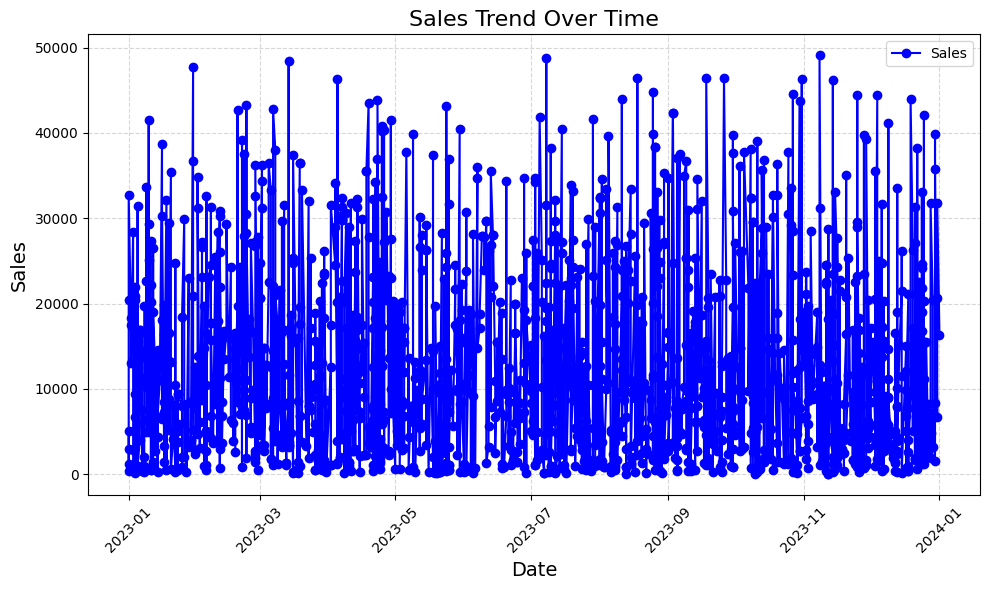

In [16]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort data by date to ensure proper trend visualization
df = df.sort_values(by='Date')

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Sales'], marker='o', linestyle='-', color='blue', label='Sales')

# Add titles and labels
plt.title("Sales Trend Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Sales", fontsize=14)

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Use histograms or box plots to analyze the distribution of Price and Sales.

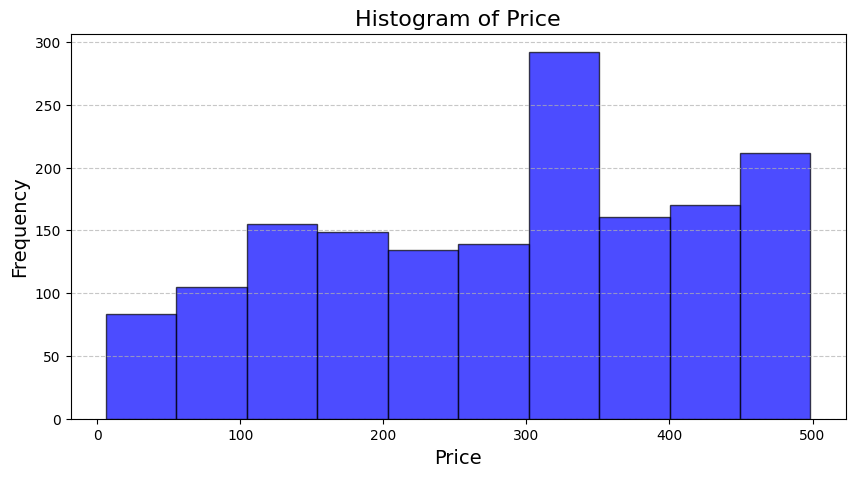

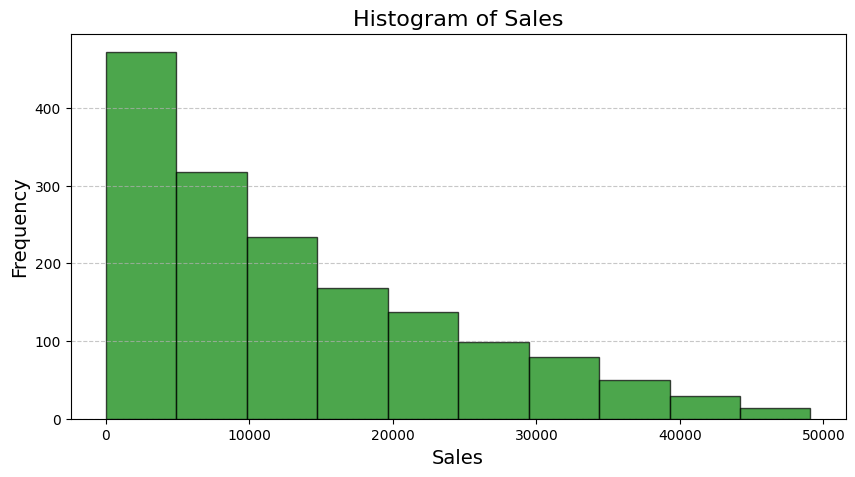

In [18]:
# Plot Histogram for Price
plt.figure(figsize=(10, 5))
plt.hist(df['Price'], bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Price', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot Histogram for Sales
plt.figure(figsize=(10, 5))
plt.hist(df['Sales'], bins=10, color='green', alpha=0.7, edgecolor='black')
plt.title('Histogram of Sales', fontsize=16)
plt.xlabel('Sales', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# Answer Key Questions:

## What is the overall trend of sales when the price increases or decreases?
Since correlation is very low, the change in price does not effect the sales 

## Are there any specific price ranges where sales tend to be higher or lower?
No, almost similar trend

## Does the dataset show any seasonal variations in sales (e.g., higher sales during certain months or holidays)?
Yes, the dataset shows seasonal variations in sales. There are clear spikes in April and July, suggesting higher sales during these months, possibly due to seasonal demand or events. Conversely, June exhibits the lowest sales, indicating a potential off-season. The end of the year (November and December) shows stable sales, which could be related to year-end or holiday activities. These patterns reflect significant seasonal trends in the data.


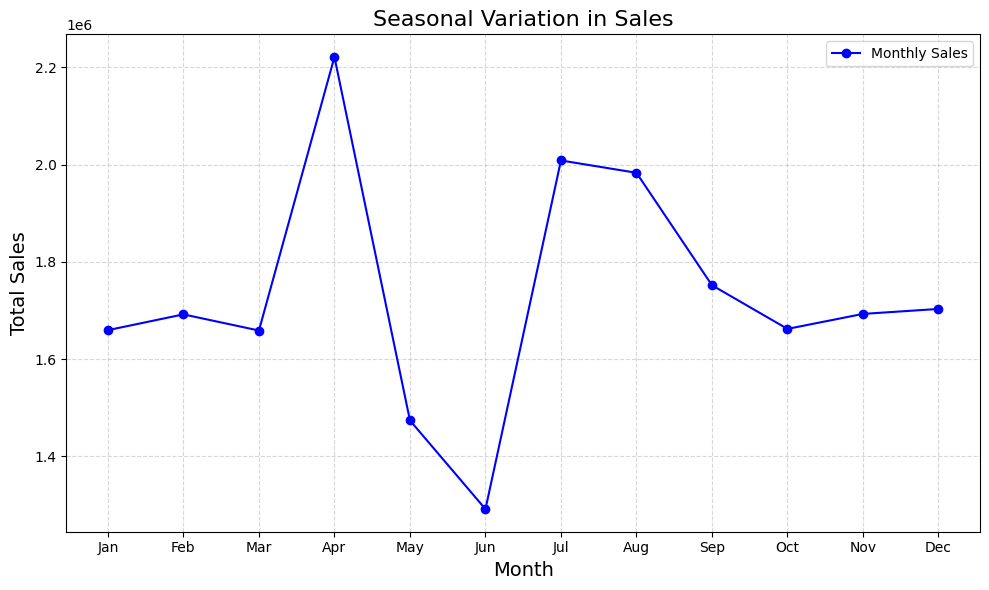

In [19]:
# Extract the month from the date
df['Month'] = df['Date'].dt.month

# Group by month and calculate total sales
monthly_sales = df.groupby('Month')['Sales'].sum()

# Plot the seasonal trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='blue', label='Monthly Sales')
plt.title("Seasonal Variation in Sales", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Conclusion

## Based on your findings, what insights can you draw about the relationship between product prices and sales volume?
Inelastic relationshiop



Correlation between Price and Sales: 0.031528720417514054


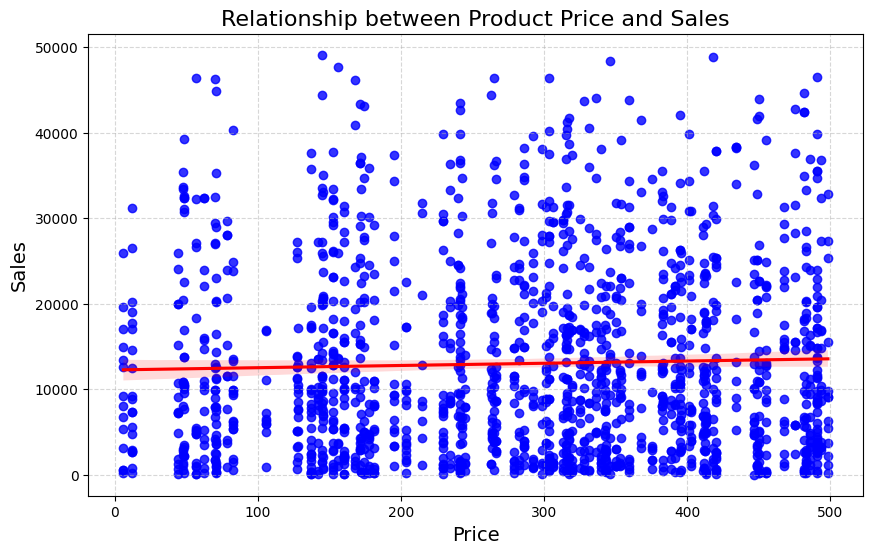

In [23]:
# Calculate Correlation
correlation = df['Price'].corr(df['Sales'])
print(f"Correlation between Price and Sales: {correlation}")

# Scatter Plot with Linear Fit
plt.figure(figsize=(10, 6))
sns.regplot(x='Price', y='Sales', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Relationship between Product Price and Sales', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## If you were the manager of the store, what pricing strategy would you recommend to maximize sales based on your analysis?
higher discounts can be provides, during off seasons like may, june. Also, more discounts can be offered to stores where sales is relatively low.